In [48]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
import cv2
from skimage.io import imread
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
df = pd.read_csv("train_set.csv")

In [3]:
df["label"].value_counts()

label
happy       7164
neutral     4982
sad         4938
fear        4103
angry       3993
surprise    3205
disgust      436
Name: count, dtype: int64

In [57]:
ROOT_PATH = os.getcwd()

TRAIN_PATH = ROOT_PATH + "\\data\\data\\images\\train"
TEST_PATH = ROOT_PATH + "\\data\\data\\images\\test"
filenames_train = os.listdir(TRAIN_PATH)
filenames_test = os.listdir(TEST_PATH)

IMAGE_WIDTH=48
IMAGE_HEIGHT=48
IMAGE_CHANNELS=1
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
BATCH_SIZE = 32
EPOCHS = 50
earlystop = EarlyStopping(patience=5)
mcheckpoint = ModelCheckpoint("ej_paisaje.h5")
label_encoder = LabelEncoder()

In [58]:
print(ROOT_PATH)
print(TRAIN_PATH)
print(filenames_train)

c:\Users\adria\Desktop\emociones
c:\Users\adria\Desktop\emociones\data\data\images\train
['angry', 'happy', 'sad']


In [64]:
def read_data(path, archivos, im_size):
    X = []
    Y = []

    ##### CODE #####
    # Iterar sobre todo lo que haya en path
    for i in archivos:
        current_path = os.path.join(path, i)

        for j in os.listdir(current_path):
            image_path = os.path.join(current_path, j)
            print(image_path)
            # Leer la imagen y aplicarle el resize
            image = imread(image_path)
            smallimage = cv2.resize(image, (im_size, im_size))
            # Guardo en X
            X.append(smallimage)
            Y.append(i)
            

        
    
    return np.array(X),Y

X_train2, y_train2 = read_data(TRAIN_PATH, filenames_train, IMAGE_WIDTH)
X_test2, y_test2 = read_data(TEST_PATH, filenames_test, IMAGE_WIDTH)

print(X_train.shape)
print(X_test.shape)

c:\Users\adria\Desktop\emociones\data\data\images\train\angry\0.jpg
angry
c:\Users\adria\Desktop\emociones\data\data\images\train\angry\1.jpg
angry
c:\Users\adria\Desktop\emociones\data\data\images\train\angry\10.jpg
angry
c:\Users\adria\Desktop\emociones\data\data\images\train\angry\10002.jpg
angry
c:\Users\adria\Desktop\emociones\data\data\images\train\angry\10016.jpg
angry
c:\Users\adria\Desktop\emociones\data\data\images\train\angry\10037.jpg
angry
c:\Users\adria\Desktop\emociones\data\data\images\train\angry\10038.jpg
angry
c:\Users\adria\Desktop\emociones\data\data\images\train\angry\10057.jpg
angry
c:\Users\adria\Desktop\emociones\data\data\images\train\angry\10063.jpg
angry
c:\Users\adria\Desktop\emociones\data\data\images\train\angry\10069.jpg
angry
c:\Users\adria\Desktop\emociones\data\data\images\train\angry\10100.jpg
angry
c:\Users\adria\Desktop\emociones\data\data\images\train\angry\10105.jpg
angry
c:\Users\adria\Desktop\emociones\data\data\images\train\angry\10115.jpg
ang

KeyboardInterrupt: 

In [60]:
X_train

array([[[ 72,  78,  81, ...,  52,  43,  40],
        [ 65,  62,  59, ...,  55,  52,  45],
        [ 47,  42,  60, ...,  47,  54,  49],
        ...,
        [ 91,  65,  46, ...,  74,  54,  43],
        [ 76,  80,  76, ..., 108,  69,  46],
        [ 77,  74,  81, ..., 105, 108,  82]],

       [[152, 149, 147, ..., 129, 139, 121],
        [149, 152, 150, ..., 121, 146, 135],
        [152, 152, 157, ..., 112, 121, 145],
        ...,
        [187, 189, 120, ..., 184, 185, 188],
        [188, 189, 193, ..., 185, 181, 189],
        [186, 185, 183, ..., 193, 181, 183]],

       [[ 29,  25,  21, ...,  38,  45,  37],
        [ 31,  24,  20, ...,  36,  36,  40],
        [ 28,  21,  21, ...,  35,  32,  40],
        ...,
        [ 28,  29,  26, ..., 118, 137, 148],
        [ 30,  30,  26, ..., 151, 158, 164],
        [ 32,  30,  27, ..., 174, 173, 174]],

       ...,

       [[ 44,  44,  45, ..., 174, 154, 105],
        [ 41,  41,  42, ..., 192, 172, 148],
        [ 40,  40,  41, ..., 194, 189, 173

{0, 1, 2}

(48, 48)


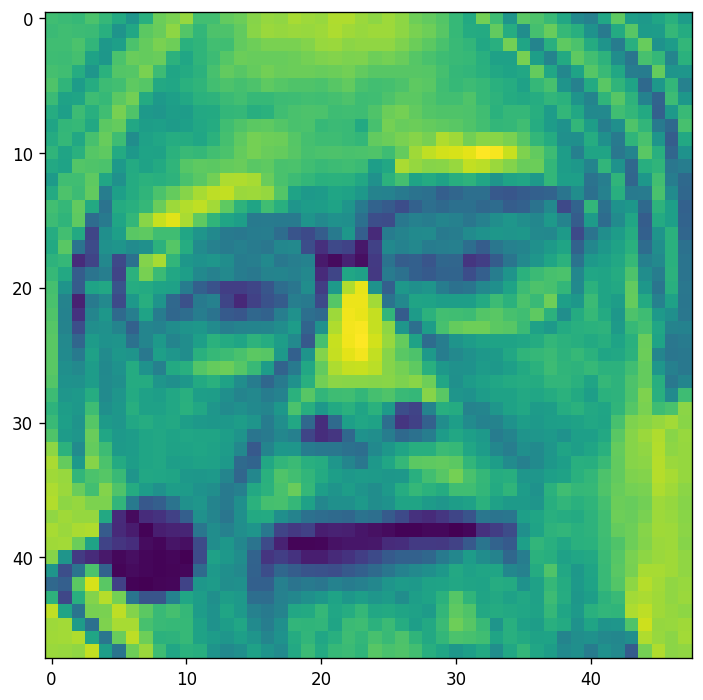

In [62]:
print(X_train[1].shape)
plt.imshow(X_train[1]);

In [63]:
y_train = label_encoder.fit_transform(y_train)
y_train = np.array(y_train)
print(y_train.max())

2


In [71]:
y_test = label_encoder.fit_transform(y_test)
y_test = np.array(y_test)

In [70]:
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0
Max: 255


In [72]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [73]:
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0.0
Max: 1.0


In [74]:
layers = [
    keras.layers.Conv2D(48, (1,1), activation='relu', input_shape=IMAGE_SIZE),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(input_shape = IMAGE_SIZE),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]


model = keras.Sequential(layers)

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 48)        96        
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 48)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 128)       55424     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 11, 11, 128)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 15488)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [76]:
history = model.fit(X_train,
         y_train,
         epochs = EPOCHS,
         batch_size = BATCH_SIZE,
         callbacks = [earlystop, mcheckpoint],
         validation_split = 0.2)

Epoch 1/50
403/403 [==============================] - 32s 78ms/step - loss: 0.4803 - accuracy: 0.5559 - val_loss: -0.8120 - val_accuracy: 0.0000e+00
Epoch 2/50
  1/403 [..............................] - ETA: 29s - loss: 0.3756 - accuracy: 0.7500

c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


403/403 [==============================] - 31s 76ms/step - loss: 0.4272 - accuracy: 0.5564 - val_loss: -0.6152 - val_accuracy: 0.0000e+00
Epoch 3/50
403/403 [==============================] - 31s 77ms/step - loss: 0.3902 - accuracy: 0.5654 - val_loss: -1.8785 - val_accuracy: 0.0000e+00
Epoch 4/50
403/403 [==============================] - 31s 77ms/step - loss: 0.3418 - accuracy: 0.5868 - val_loss: -3.8978 - val_accuracy: 0.0000e+00
Epoch 5/50
403/403 [==============================] - 36s 88ms/step - loss: 0.2649 - accuracy: 0.5919 - val_loss: -3.6930 - val_accuracy: 0.0000e+00
Epoch 6/50
403/403 [==============================] - 33s 81ms/step - loss: -0.1890 - accuracy: 0.5966 - val_loss: -32.3795 - val_accuracy: 0.0000e+00
Epoch 7/50
403/403 [==============================] - 33s 82ms/step - loss: -2.3278 - accuracy: 0.5999 - val_loss: -83.0066 - val_accuracy: 0.0000e+00
Epoch 8/50
403/403 [==============================] - 31s 78ms/step - loss: -12.8068 - accuracy: 0.5982 - val_los

KeyboardInterrupt: 